In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

/home/trrrrr/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


4
WARN: <class 'wrappers.FrameStack'> doesn't implement 'reset' method, but it implements deprecated '_reset' method.
done


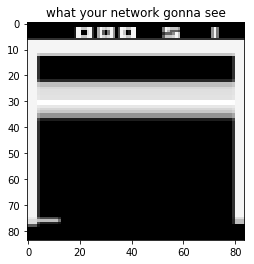

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name1 = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [ ]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
import networks
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.9,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.985,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariDuelingDQN()
    }


pong_noisy_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.0,
    'MIN_EPSILON' : 0.00,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.0,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = breakout_dddqn_config)
#agent.restore('nn/DDDQNPongNoFrameskip-v4')
#agent.epsilon = 0.02

In [ ]:
env.reset()
agent.train()

255
saving next best rewards:  0.1
710
saving next best rewards:  0.6
970
Frames per seconds:  204.86381988138882
1370
1725
Frames per seconds:  199.71535244538342
2015
2415
2800
Frames per seconds:  202.47225126790627
3075
3305
3710
3940
Frames per seconds:  194.79372774361988
4340
4715
Frames per seconds:  198.02809661106608
5070
5300
5625
5975
Frames per seconds:  197.99418201757783
6285
6540
6925
Frames per seconds:  196.76627694849353
7200
7480
7810
Frames per seconds:  203.14054606943543
8165
8640
8990
Frames per seconds:  202.71949222689443
9305
9610
Frames per seconds:  202.71626878306316
10065
10495
10920
Frames per seconds:  204.244908612628
11305
11765
Frames per seconds:  202.8498090670678
12095
12355
12630
12935
Frames per seconds:  204.22451168000174
13195
13590
13945
Frames per seconds:  203.10959854767307
14230
14675
Frames per seconds:  196.41956918298237
15015
15365
15750
Frames per seconds:  195.63742439656014
16080
16480
16710
Frames per seconds:  192.21564720857253

In [ ]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [ ]:

print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)

import gym.wrappers
env_monitor = make_atari_deepmind(env_name)
env_monitor = gym.wrappers.Monitor(env,directory='video_dddqn',force=True)
sessions = [evaluate(env_monitor) for _ in range(5)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()